In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import datetime
import time

import os, os.path
from os import listdir
from os.path import isfile, join

import re
# from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import sys

# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
import NASA_plot_core as npc

In [3]:
meta_dir = "/Users/hn/Documents/01_research_data/NASA/parameters/"
meta = pd.read_csv(meta_dir+"evaluation_set.csv")
meta_moreThan10Acr=meta[meta.ExctAcr>10]
print (meta.shape)
print (meta_moreThan10Acr.shape)
meta.head(2)

(6340, 8)
(3539, 8)


,ID,CropTyp,Irrigtn,DataSrc,Acres,ExctAcr,LstSrvD,county
0,100010_WSDA_SF_2017,alfalfa hay,center pivot,wsda,34,34.310305,2017/09/12,Grant
1,100204_WSDA_SF_2017,alfalfa hay,center pivot,wsda,62,61.826535,2017/08/09,Grant


In [ ]:
VI_idx="EVI"

In [21]:
landsat_dir = "/Users/hn/Documents/01_research_data/NASA/VI_TS/data_for_train_individual_counties/"
landsat_fNames = [x for x in os.listdir(landsat_dir) if x.endswith(".csv")]

landsat_DF = pd.DataFrame()
for fName in landsat_fNames:
    curr = pd.read_csv(landsat_dir+fName)
    curr.dropna(subset=[VI_idx], inplace=True)
    landsat_DF=pd.concat([landsat_DF, curr])

landsat_DF.reset_index(drop=True, inplace=True)

In [6]:
SG_data_dir = "/Users/hn/Documents/01_research_data/NASA/VI_TS/05_SG_TS/"
file_names = ["SG_Walla2015_" + VI_idx + "_JFD.csv", "SG_AdamBenton2016_" + VI_idx + "_JFD.csv", 
              "SG_Grant2017_" + VI_idx + "_JFD.csv", "SG_FranklinYakima2018_"+ VI_idx +"_JFD.csv"]

SG_data_4_plot=pd.DataFrame()

for file in file_names:
    curr_file=pd.read_csv(SG_data_dir + file)
    curr_file['human_system_start_time'] = pd.to_datetime(curr_file['human_system_start_time'])
    
    # These data are for 3 years. The middle one is the correct one
    all_years = sorted(curr_file.human_system_start_time.dt.year.unique())
    if len(all_years)==3 or len(all_years)==2:
        proper_year = all_years[1]
    elif len(all_years)==1:
        proper_year = all_years[0]

    curr_file = curr_file[curr_file.human_system_start_time.dt.year==proper_year]
    SG_data_4_plot=pd.concat([SG_data_4_plot, curr_file])

SG_data_4_plot.reset_index(drop=True, inplace=True)
SG_data_4_plot.head(2)


,ID,human_system_start_time,EVI
0,135073_WSDA_SF_2015,2015-01-10,0.054429
1,135073_WSDA_SF_2015,2015-01-20,0.051731


In [35]:
field_IDs = ["102715_WSDA_SF_2018", "1147_WSDA_SF_2016"]

curr_meta=meta[meta.ID==field_IDs[0]].copy()
curr_SG_data=SG_data_4_plot[SG_data_4_plot.ID==field_IDs[0]].copy()

curr_landsat_DF=landsat_DF[landsat_DF.ID==field_IDs[0]].copy()
curr_landsat_DF=nc.add_human_start_time_by_system_start_time(curr_landsat_DF)

curr_landsat_DF.sort_values(by=['human_system_start_time'], inplace=True)
curr_SG_data.sort_values(by=['human_system_start_time'], inplace=True)

curr_year=curr_SG_data.human_system_start_time.dt.year.unique()[0]
curr_landsat_DF=curr_landsat_DF[curr_landsat_DF.human_system_start_time.dt.year==curr_year]

In [11]:
size = 15
title_FontSize = 8
legend_FontSize = 8
tick_FontSize = 12
label_FontSize = 14

params = {'legend.fontsize': 15, # medium, large
          # 'figure.figsize': (6, 4),
          'axes.labelsize': size,
          'axes.titlesize': size*1.2,
          'xtick.labelsize': size, #  * 0.75
          'ytick.labelsize': size, #  * 0.75
          'axes.titlepad': 10}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)

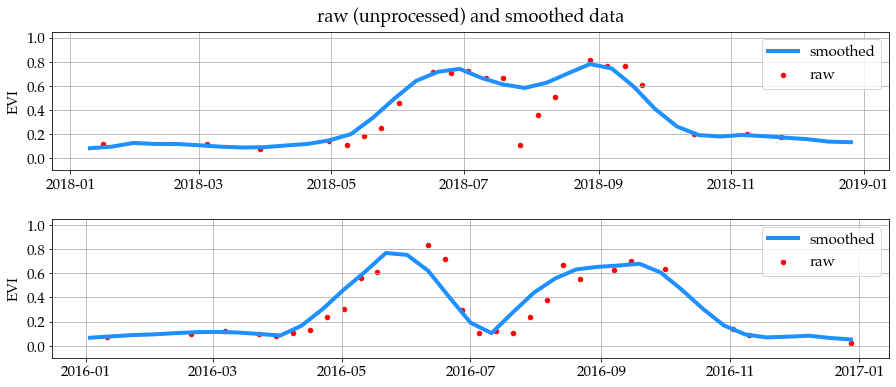

In [42]:
titlee="raw (unprocessed) and smoothed data"
fig, axs = plt.subplots(2, 1, figsize=(15, 6), sharex=False, sharey='col', # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

(ax1, ax2) = axs; ax1.grid(True); ax2.grid(True)


curr_SG_data=SG_data_4_plot[SG_data_4_plot.ID==field_IDs[0]].copy()
curr_landsat_DF=landsat_DF[landsat_DF.ID==field_IDs[0]].copy()
curr_landsat_DF=nc.add_human_start_time_by_system_start_time(curr_landsat_DF)

curr_landsat_DF.sort_values(by=['human_system_start_time'], inplace=True)
curr_SG_data.sort_values(by=['human_system_start_time'], inplace=True)

curr_year=curr_SG_data.human_system_start_time.dt.year.unique()[0]
curr_landsat_DF=curr_landsat_DF[curr_landsat_DF.human_system_start_time.dt.year==curr_year]

ax1.plot(curr_SG_data['human_system_start_time'], curr_SG_data[VI_idx], 
        linewidth=4, color="dodgerblue", label="smoothed") 

ax1.scatter(curr_landsat_DF['human_system_start_time'], 
           curr_landsat_DF[VI_idx], 
           s=20, c="r", label="raw")

ax1.set_title(titlee)
ax1.set_ylabel(VI_idx) # , labelpad=20); # fontsize = label_FontSize,
ax1.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
ax1.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
ax1.legend(loc="upper right");

#################################### ax 2
curr_SG_data=SG_data_4_plot[SG_data_4_plot.ID==field_IDs[1]].copy()
curr_landsat_DF=landsat_DF[landsat_DF.ID==field_IDs[1]].copy()
curr_landsat_DF=nc.add_human_start_time_by_system_start_time(curr_landsat_DF)

curr_landsat_DF.sort_values(by=['human_system_start_time'], inplace=True)
curr_SG_data.sort_values(by=['human_system_start_time'], inplace=True)

curr_year=curr_SG_data.human_system_start_time.dt.year.unique()[0]
curr_landsat_DF=curr_landsat_DF[curr_landsat_DF.human_system_start_time.dt.year==curr_year]

ax2.plot(curr_SG_data['human_system_start_time'], curr_SG_data[VI_idx], 
         linewidth=4, color="dodgerblue", label="smoothed") 

ax2.scatter(curr_landsat_DF['human_system_start_time'], 
           curr_landsat_DF[VI_idx], 
           s=20, c="r", label="raw")

ax2.set_ylabel(VI_idx) # , labelpad=20); # fontsize = label_FontSize,
ax2.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
ax2.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
ax2.legend(loc="upper right");

####################################


plt.yticks(np.arange(0, 1.05, 0.2));
# ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.set_ylim(-0.1, 1.05);
ax2.set_ylim(-0.1, 1.05);

plot_dir = "/Users/hn/Documents/01_research_data/NASA/for_paper/plots/"
os.makedirs(plot_dir, exist_ok=True)

file_name = plot_dir + "raw_vs_smoothed_" + VI_idx + ".pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);


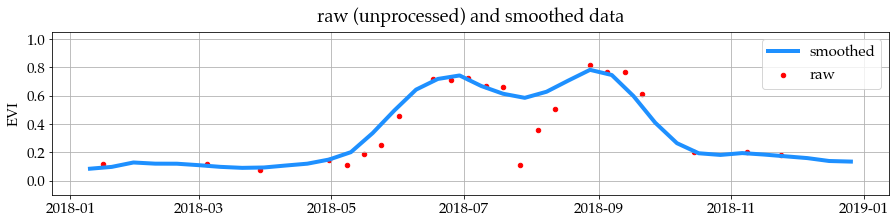

In [45]:
titlee="raw (unprocessed) and smoothed data"
fig, ax = plt.subplots(1, 1, figsize=(15, 3), sharex=False, sharey='col', # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

axs; ax.grid(True)


curr_SG_data=SG_data_4_plot[SG_data_4_plot.ID==field_IDs[0]].copy()
curr_landsat_DF=landsat_DF[landsat_DF.ID==field_IDs[0]].copy()
curr_landsat_DF=nc.add_human_start_time_by_system_start_time(curr_landsat_DF)

curr_landsat_DF.sort_values(by=['human_system_start_time'], inplace=True)
curr_SG_data.sort_values(by=['human_system_start_time'], inplace=True)

curr_year=curr_SG_data.human_system_start_time.dt.year.unique()[0]
curr_landsat_DF=curr_landsat_DF[curr_landsat_DF.human_system_start_time.dt.year==curr_year]

ax.plot(curr_SG_data['human_system_start_time'], curr_SG_data[VI_idx], 
        linewidth=4, color="dodgerblue", label="smoothed") 

ax.scatter(curr_landsat_DF['human_system_start_time'], 
           curr_landsat_DF[VI_idx], 
           s=20, c="r", label="raw")

ax.set_title(titlee)
ax.set_ylabel(VI_idx) # , labelpad=20); # fontsize = label_FontSize,
ax.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
ax.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
ax.legend(loc="upper right");
ax.set_ylim(-0.1, 1.05);

plt.yticks(np.arange(0, 1.05, 0.2));
# ax.xaxis.set_major_locator(mdates.YearLocator(1))

plot_dir = "/Users/hn/Documents/01_research_data/NASA/for_paper/plots/"
os.makedirs(plot_dir, exist_ok=True)

file_name = plot_dir + "raw_vs_smoothed_field1_" + VI_idx + ".pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);


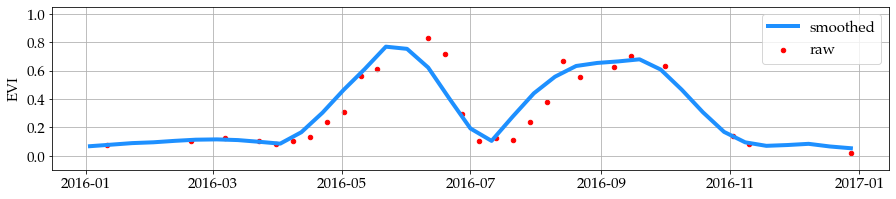

In [44]:
titlee="raw (unprocessed) and smoothed data"
fig, ax = plt.subplots(1, 1, figsize=(15, 3), sharex=False, sharey='col', # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.35, 'wspace': .05});

axs; ax.grid(True)


curr_SG_data=SG_data_4_plot[SG_data_4_plot.ID==field_IDs[1]].copy()
curr_landsat_DF=landsat_DF[landsat_DF.ID==field_IDs[1]].copy()
curr_landsat_DF=nc.add_human_start_time_by_system_start_time(curr_landsat_DF)

curr_landsat_DF.sort_values(by=['human_system_start_time'], inplace=True)
curr_SG_data.sort_values(by=['human_system_start_time'], inplace=True)

curr_year=curr_SG_data.human_system_start_time.dt.year.unique()[0]
curr_landsat_DF=curr_landsat_DF[curr_landsat_DF.human_system_start_time.dt.year==curr_year]

ax.plot(curr_SG_data['human_system_start_time'], curr_SG_data[VI_idx], 
        linewidth=4, color="dodgerblue", label="smoothed") 

ax.scatter(curr_landsat_DF['human_system_start_time'], 
           curr_landsat_DF[VI_idx], 
           s=20, c="r", label="raw")

# ax.set_title(titlee)
ax.set_ylabel(VI_idx) # , labelpad=20); # fontsize = label_FontSize,
ax.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
ax.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
ax.legend(loc="upper right");
ax.set_ylim(-0.1, 1.05);

plt.yticks(np.arange(0, 1.05, 0.2));
# ax.xaxis.set_major_locator(mdates.YearLocator(1))

plot_dir = "/Users/hn/Documents/01_research_data/NASA/for_paper/plots/"
os.makedirs(plot_dir, exist_ok=True)

file_name = plot_dir + "raw_vs_smoothed_field2_" + VI_idx + ".pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);